PCA + KNN vs Kmeans

In [4]:
import json
from tokenize import String
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

load image

In [5]:
jsonPath = 'C:\\Users\\xinzh\\Downloads\\Data\\Data\\Annotations\\annotated_functional_test3_fixed.json'
# load json file
jsonFile = open(jsonPath)
# read json in dict
dataDict = json.load(jsonFile)
dataDictimages = dataDict["images"]
dataDictannoted = dataDict["annotations"]

image analysis

In [49]:
csvPath = 'C:\\Users\\xinzh\\Downloads\\Data\\Data\\Annotations\\annotated_functional_test3_fixed.csv'
img_pd= pd.read_csv(csvPath)
""" counts = img_pd['annotations/iscrowd'].value_counts()
print(img_pd)
print(counts) """
imageColumn = ['images/id', 'images/file_name']
annotatedColumn = ['annotations/id', 'annotations/image_id','annotations/bbox/0','annotations/bbox/1','annotations/bbox/2','annotations/bbox/3']
imagePd = img_pd[imageColumn]
annotatedPd = img_pd[annotatedColumn]
annotatedPd = annotatedPd.dropna(axis=0,how='any') 
"""print(annotatedPd) """
print(annotatedPd.describe())
labelPd =  pd.read_csv('label0-896.csv')
labelPd.head(20)

       annotations/id  annotations/image_id  annotations/bbox/0  \
count      897.000000          8.970000e+02          897.000000   
mean    504441.000000          7.051222e+06          844.486065   
std        259.085893          1.589653e+04          508.954939   
min     503993.000000          7.025372e+06            0.000000   
25%     504217.000000          7.037292e+06          436.000000   
50%     504441.000000          7.052318e+06          855.000000   
75%     504665.000000          7.066398e+06         1236.000000   
max     504889.000000          7.076484e+06         1874.000000   

       annotations/bbox/1  annotations/bbox/2  annotations/bbox/3  
count          897.000000          897.000000          897.000000  
mean           643.261984          255.693423          236.121516  
std            267.714453          213.204977          221.549630  
min              0.000000           17.000000           15.000000  
25%            448.000000           84.000000           

,annotation_index,image_id,human_label,label_name
0,0,7057517,2,Other
1,1,7073954,2,Other
2,2,7073954,1,Dent
3,3,7074070,4,Scratch
4,4,7062766,1,Dent
5,5,7060727,3,Rim
6,6,7031758,4,Scratch
7,7,7046567,3,Rim
8,8,7060786,1,Dent
9,9,7071047,3,Rim


image proprocess
1. trun it to gray image
2. resize all annotated area to 255*240
3. denoise - centered - normolized
4. PCA analyse
5. Kmeans vs KNN

In [7]:
from skimage.color import rgb2gray
lenImages = len(dataDictimages)
lenAnnoted = len(dataDictannoted)


def imageQuery(imageid):
    for indexImages in range(0, lenImages):
        if imageid == dataDictimages[indexImages]["id"]:
            return indexImages
        elif indexImages == lenImages:
            print("Don't find this annnoted image")

X_data = []
Y_label = []

for indexAnnoted in range(0, lenAnnoted):
    curImageid = dataDictannoted[indexAnnoted]["image_id"]
    curPointpos = dataDictannoted[indexAnnoted]["segmentation"]
    curindexImages = imageQuery(curImageid)
    # curFilepath is only file path in folder Images
    curImagepath = dataDictimages[curindexImages]["file_name"]
    # get crop images
    curfullImagepath = "../../Images/" + curImagepath
    img = Image.open(curfullImagepath)
    # get position right up corner and left down corner
    curRegionpos = np.array([curPointpos[0][0], curPointpos[0][1], curPointpos[0][4], curPointpos[0][5]])
    curRegion = img.crop(curRegionpos)
    # resize = mean of bbox width of height
    curRegion = curRegion.resize((8, 8))
    # rgbtogray
    grayRegion = rgb2gray(curRegion)
    # generate dataset
    X_data.append(np.asarray(grayRegion).flatten()/255)
    # print(labelPd[labelPd['annotation_index']==indexAnnoted]['human_label'])
    Y_label.append(np.array(labelPd[labelPd['annotation_index']==indexAnnoted]['human_label'])[0])

print(X_data)
print(Y_label)

[array([0.0019055 , 0.0019451 , 0.00194948, 0.00192637, 0.00195275,
       0.0019231 , 0.00196924, 0.00198024, 0.00207251, 0.00226263,
       0.0022286 , 0.00227022, 0.00227573, 0.00265789, 0.00256457,
       0.00228679, 0.00274369, 0.00310942, 0.00293588, 0.00322787,
       0.00307402, 0.00299725, 0.00317616, 0.00294338, 0.00311254,
       0.0037328 , 0.00332893, 0.00372284, 0.00374038, 0.00314555,
       0.00381296, 0.00273035, 0.00359138, 0.00362847, 0.00314234,
       0.00392157, 0.00345061, 0.0032752 , 0.00363285, 0.00271623,
       0.00356614, 0.00364385, 0.00295896, 0.00392157, 0.00303118,
       0.00349584, 0.00347585, 0.00291178, 0.00369892, 0.00360425,
       0.00304128, 0.00390181, 0.00290725, 0.00372305, 0.00324301,
       0.00302159, 0.00382291, 0.00352193, 0.00317963, 0.00387432,
       0.00289409, 0.00381964, 0.00307294, 0.00330266]), array([0.00273108, 0.00274646, 0.00273435, 0.00273108, 0.00273108,
       0.00274646, 0.00274973, 0.00275083, 0.00276184, 0.00277395,
    

hier
{2: 87, 1: 265, 4: 280, 3: 265}


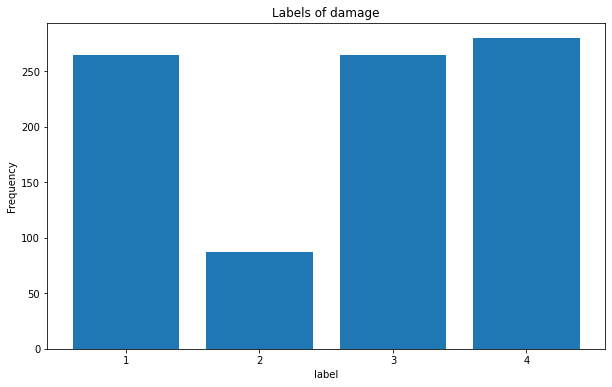

In [51]:
X_data = pd.DataFrame(X_data)

def drawBar(labels):
    xticks = [1, 2, 3, 4]
    labelGroup = {}
    print('hier')
    for label in labels:
        labelGroup[label] = labelGroup.get(label, 0) + 1
    print(labelGroup)
    plt.figure(figsize=(10,6))
    plt.bar(range(4), [labelGroup.get(xtick, 0) for xtick in xticks], align='center')
    plt.xticks(range(4), xticks)
    plt.xlabel('label')
    plt.ylabel('Frequency')
    plt.title('Labels of damage')
    plt.show() 

drawBar(Y_label)

Kmeans

try to find best K with elbow methode
1. use original data
2. PCA data

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def Kmeans_Elbow(X_data, stdScal):
     
    distortions = []
    inertias = []
    K = range(1, 12)

    for k in K:
        # Building and fitting the model
        if stdScal:
            estimator = make_pipeline(StandardScaler(), KMeans()).fit(X_data)
            distortions.append(sum(np.min(cdist(X_data, estimator[-1].cluster_centers_,
                                        'euclidean'), axis=1)) / X_data.shape[0])
            inertias.append(estimator[-1].inertia_)
        else:        
            estimator = KMeans().fit(X_data)
            distortions.append(sum(np.min(cdist(X_data, estimator.cluster_centers_,
                                        'euclidean'), axis=1)) / X_data.shape[0])
            inertias.append(estimator.inertia_)
        
        
    return distortions, inertias


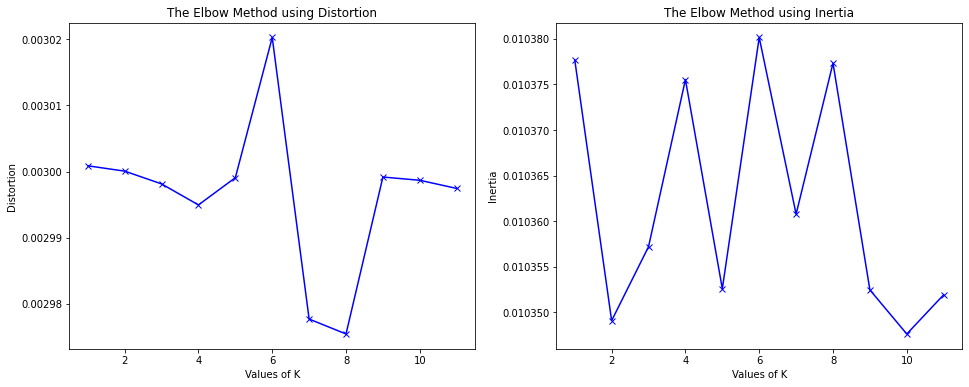

In [23]:
distortions, inertias = Kmeans_Elbow(X_data, False)
K = range(1, 12)
plt.figure(1,figsize=(16,6))
plt.subplot(1, 2, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

plt.figure(1)
plt.subplot(1, 2, 2)#当前画在第一行第2列图上
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


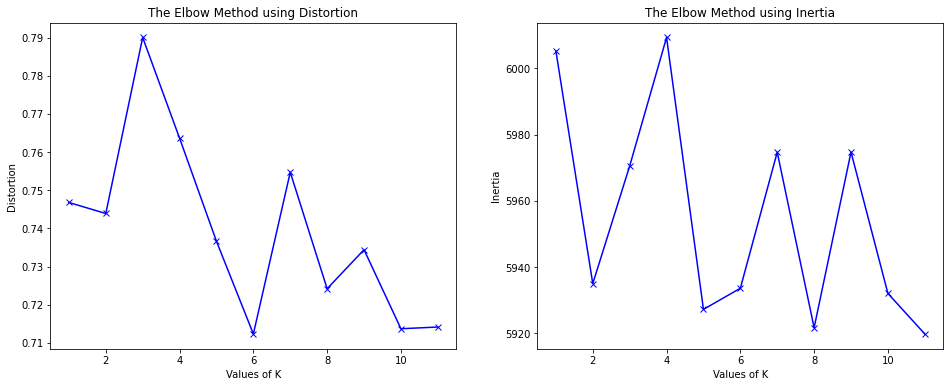

In [27]:
pca1 = PCA(n_components=10)
T1 = pca1.fit_transform(X_data)
X_data_pca = pd.DataFrame(T1).add_prefix('T')

distortions, inertias = Kmeans_Elbow(X_data_pca, True)
K = range(1, 12)
plt.figure(1,figsize=(16,6))
plt.subplot(1, 2, 1) #图一包含1行2列子图，当前画在第一行第一列图上
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

plt.figure(1)
plt.subplot(1, 2, 2)#当前画在第一行第2列图上
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [13]:
# data split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_label, test_size=0.33, random_state=42)

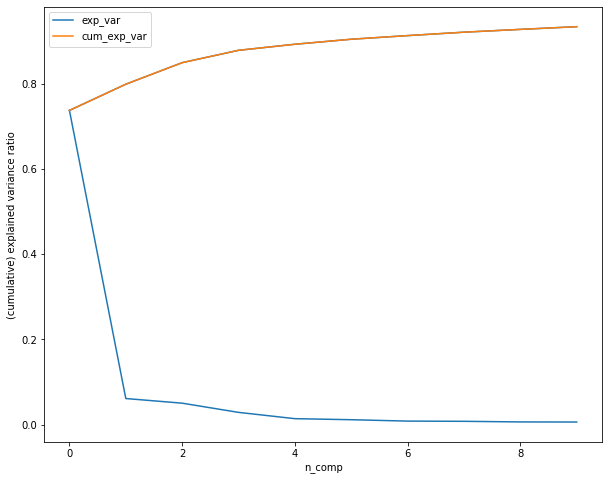

In [39]:
# centered - normolized
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

# dimension reduction PCA
# n_components can be take by test
pca1 = PCA(n_components=10)
pca1.fit(X_train_s)
evr1 = pca1.explained_variance_ratio_
plt.figure(figsize=(10,8))
sns.lineplot(x=np.arange(10),y=np.cumsum(evr1))
plotdf = pd.DataFrame({'n_comp': np.arange(10), 'exp_var': evr1, 'cum_exp_var': np.cumsum(evr1)})
sns.lineplot(x='n_comp', y='(cumulative) explained variance ratio', hue='', data=pd.melt(plotdf, ['n_comp'], var_name='', value_name='(cumulative) explained variance ratio'))
plt.show()

In [34]:
# x_train onhe with the 10 PCA componets
T1 = pca1.transform(X_train_s)
x_train_pca = pd.DataFrame(T1).add_prefix('T')
x_train_pca.head()
print(np.shape(y_train))

(600,)


In [35]:

def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    # estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    estimator = kmeans.fit(data)
    fit_time = time() - t0
    # results = [name, fit_time, estimator[-1].inertia_]
    results = [name, fit_time, estimator.inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
         metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator.labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [36]:
from sklearn.cluster import KMeans

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X_data, labels=Y_label)

kmeans = KMeans(init="random", n_clusters=4, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X_train, labels=y_train)

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=x_train_pca, labels=y_train)

kmeans = KMeans(init="random", n_clusters=4, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=x_train_pca, labels=y_train)

pca = PCA(n_components=4).fit(X_train)
kmeans = KMeans(init=pca.components_, n_clusters=4, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=X_train, labels=y_train)


print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.021s	0	0.065	0.066	0.065	0.038	0.062	0.264
random   	0.049s	0	0.064	0.064	0.064	0.044	0.059	0.261
k-means++	0.021s	9860	0.068	0.068	0.068	0.044	0.063	0.321
random   	0.021s	9860	0.067	0.067	0.067	0.043	0.062	0.315
PCA-based	0.010s	0	0.064	0.064	0.064	0.044	0.059	0.269
__________________________________________________________________________________


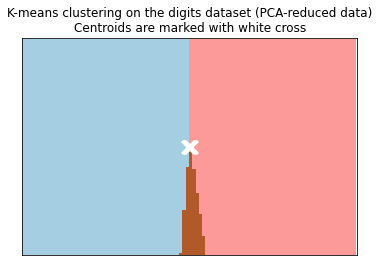

In [42]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X_train)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()